# Лекция 1

## Метод купных частиц  
## Часть 7

<a id = "s_sec25"></a>
### 25. Метод частиц в ячейкках.

Рассмотрим в этом разделе метод частиц в ячейках (particle-in-cell) для однокомпонентной среды. Метод частиц в ячейках был предложен в лаборатории Лос-Аламос (США) Френсисом Х. Харлоу в 1955 году. Данный метод зарекомендовал себя в большей степени для решения задач физики плазмы, однако ряд численных подходов на основе метода частиц в ячейках также плодотворно используется для расчетов динамики жидкостей и газов. 

В методе частиц в ячейках используется дискретная модель сплошной среды, причем занятое жидкостью пространство разбивается сеткой фиксированных ячеек. Внутри этих ячеек сплошная среда представляется частицами, каждая из которох несет фиксированную массу жидкости. Таким образом, имеем лагранжеву систему координат (частиц), наложенную на неподвижную эйлерову сетку.

Для простоты предположим, что граница исследуемой области $\tau$ фискирована и поток через неё равен нулю. Пусть вещество характеризуется одним уравнением состояния, которое связывает величины плотности $\rho$, давления $p$ и удельной внутренней энергии $\epsilon$.

В соответствии с трактовкой Лагранжа, скорость расчетной точки определяется из соотношения

\begin{equation}
\dot x = \frac{dx}{dt} = W(x,t)
\label{eq:lag_velocity}
\end{equation}

где $x$ и $W$ рассматриваются в одномерном случае как скаляры, а в многомерном - как векторы. 

Интегрируя уравение $\eqref{eq:lag_velocity}$ получим $x = x(x_0,t)$ - положение любой данной точки жидкости как функцию времени и её начального положения $x_0$. Распределение плотности $\rho(x,t)$ во времени $t$ должно удовлетворять закону сохранения массы, который можно записать в интегральной форме:

\begin{equation}
\int_{\tau} \rho (x,t) d \tau = \int_{\tau_0} \rho_0 (x_0) d \tau_0
\label{eq:cons_mass}
\end{equation}

где $\tau$ -фиксированная расчетная область (объем) в жидкости, $\tau_0$ - начальное положение этой области, $\rho_0$ - начальное распределение плотностей, а $d \tau$ и $d \tau_0$ - соответствующие элементы указанных объемных областей. 

В дифференциальной форме закон сохранения массы имеет вид:

\begin{equation}
\rho = \rho_0 \frac{u d \tau_0}{d \tau} = \rho_0 \cdot J \left( \frac{x_0}{x} \right)
\label{eq:cons_mass_diff}
\end{equation}

Здесь $J$ - якобиан в многомерном случае.

Дадим определение массы частицы. Предположим, что начальное распределение плотности $\rho_0$ представлено дельта-функциями, т.е. функциями, отличающимися от нуля только в конечном числе точек $x_{0K}$ и обращающимися в бесконечность в каждой из этих точек таким образом, что объемный интеграл от плотности в любой достаточно малой окрестности этих особых точек является постоянной характеристикой точки. Эту константу и назовем массой частицы, связанной с рассматриваемой точкой. 

Массы выбираются так, чтобы выполнялся закон сохранения, записанный в дискретной форме:

\begin{equation}
M = \int_{\tau} \rho (x,t) d \tau = \int_{\tau_0} \rho_0 (x_0) d \tau_0 = \sum_{K=1}^{n} \int_{\tau_K} \rho_0 (x_0) d \tau_0 = \sum_{K=1}^{n} m_K
\label{eq:cons_mass_discr}
\end{equation}

здесь рассматриваемая область $\tau$ разбивается на $n$ подобластей $\tau_K$ так, что каждая подобласть содержит только одну точку, в которой $\rho_0$ отличается от нуля. Для любой произвольной области $\tau$ получим:

\begin{equation}
\int_{\tau} \rho (x,t) d \tau = \int_{\tau_0} \rho_0 (x_0) d \tau_0 = \sum_{j}^{n} m_j
\label{eq:cons_mass_discr2}
\end{equation}

где сумма берется по тем частицам, которые находятся в области $\tau$ в момент времени $t$. В частности, эта область может быть свободна от частиц. В таком случае соответствующий интеграл равен нулю, однако это не нарушает закона сохранения в целом. 

Установив характеристики функции плотности и определив массу частицы, построим теперь с помощью законов сохранения импульса и энергии вычислительный процесс метода.

Предположим, что область $\tau$ покрыта эйлеровой расчетной сеткой, которая позволяет получать простые выражения для разностных представлений в любой ячейке $С$ такиих функций как градиент, дивергенция и нормальная производная. Соответствующее значение плотности находим из интеграла в левой части:

\begin{equation}
\int_{\tau_C} \rho d \tau = \rho_C \tau_C
\label{eq:approx_rho}
\end{equation}

откуда следует, что

\begin{equation}
\rho_С = \frac{1}{\tau_c} \sum_C m_j
\label{eq:rho_c}
\end{equation}

расчетный цикл (шаг по времени $\Delta t$) при переходе от временного слоя $t$ к следующему $t+\Delta t$ в методах частиц расщепляется по физическим процессам для каждой расчетной ячейки на три этапа:

- На первом, эйлеровом этапе рассматривается изменение параметров жидкости за счет сил давления в элементарном объеме, фиксированном в жидкости (лагранжевой ячейке) и совпадающим в момент времени $t^n$ с эйлеровой ячейкой - при этом происходит, естественно, изменение границ лагранжевой ячейки.

- На втором, лагранжевом этапе, проводится регуляризация расчетной сетги - лагранжев объем "возвращается" в первоначальное положение и моделируется движение потока частиц через границы эйлеровых ячеек, учиывающее обмен массой между ячейками при их перестройке (в результате чего происходит перераспределение частиц по эйлеровой сетке за период $\Delta t$); 

- На третьем заключительном этапе происходит соответствующее перераспределение массы, импульса и энергии по пространству на основе законов сохранения (здесь определяется за $\Delta t$ изменение параметров поля течения  в элементарной ячейке, полученной возвращением лагранжевого объема в прежнее положение).

По существу, расчет ведется в локальной лагранжевой системе координат, с последующим пересчетм (интерполяцией) на эйлерову сетку.

Первоначальная структура расченой сетки остается здесь фиксированной в том смысле, что она вновь "появляется" в конце каждого расчетного цикла инегрирования. Следовательно, этот метод не испытывает сложностей, присущих чисто лагранжевым методикам (искажение лагранжевых ячеек). 

В дальнейшем мы будем обозначать через $L_i$ лагранжеву ячейку, фиксированную в жидкости $E_i$ - эйлерову ячейку, фиксированную в пространстве. 
Рассмотрим каждый этап в отдельности. 

I. Эйлеров этап. 
Выпишем законы сохранения импульса и энергии для области $\tau$

где $E$ - удельная полная энергия, $\epsilon$ - удельная внутренняя энергия, $ds$ - элемент поверхности, $(p \vec W)_n$ - нормальная компонента $p \vec W$, $\vec n(x,t)$ - единичная внешняя нормаль к поверхности, $s_\tau$ - поверхность, ограничивающая объем $\tau$. 

Запишем теперь систему $\eqref{}$ для каждой лагранжевой ячейки сетки:


Заметим, что объемные ячейки $L_i$ и их поверхности $s_{L_i}$ здесь являются функциями времени, хотя в начале каждого расчетного цикла они совпадают с фиксированной эйлеровой сеткой. 

Интегрируя от $t$ до $t+\Delta t$, получим:

В выборе конкретных формул для приближенного вычисления интегралов имеется определеянная свобода. В методе частиц обычно это делается следующим образом:
а) временные интегрвалы равны произведению подынтегральных выражений в начальныйы момент $t$ и приращения времени $\Delta t$:

б) объемные интегралы, входящие в $\eqref{}$ имеют вид

где $f$ - функция от x, а $t^*$ может быть равно либо $t$ либо $t+\Delta t$.
Тогда

но $L_i$ - лагранжева ячейка, следовательно, 

Здесь суммирование проводится по всем "массовым" точкам (частицам), находящимся внутри ячейки $L_i$. 

Пусть $t=n \cdot \Delta t$. Введем следующие обозначения для $f$:

Заменяя уравнения $\eqref{}$ (или $\eqref{}$) разностными соотношениями, получим

Величины подынтегральных выражений в поверхностных интегралах выбираются следующим образом: при суммировании уравнений $\eqref{}$ пов всем ячейкам $L_i$ в области $\tau$ сумма частных интегралов должна определять общий интеграл по ограничивающей поверхности $s_\tau$. При этом должны уничтожаться интегралы на границах смежных ячеек (даже в том случае, если одна или больее этих ячеек пусты). Значения подынтегральных выражений, относящихся к поверхности ячейки, определяются из соотношений

где производные $\partial / \partial n$ по нормали к поверхности представляются центральными разностями, величина $s/2$ равна расстоянию от центра ячейки до границы. 

Таким образом, на эйлеровом этапе из формул $\eqref{}$ находятся "промежуточные" значения скорости $\vec W^*$ и внутренней энергии $\epsilon ^*$.

II. Лагранжев этап. 
На этом этапе проводится регуляризация расчетной сетки и сместившиеся лагранжевы ячейки $L_i$ возвращаются в первоначальное положение $E_i$ (здесь моделируется обмен). Следя за располложением массовых частиц, находим те из них которые пересекли границы эйлеровой сетки за время $\Delta t$ при указанной перестройке сетки. 
Проинтегровав уравнение $\eqref{}$ получим

или

Важно отметить, что в лагранжевой трактовке уравнений движения одно из основных положений заключается в том, что любой фиксированный элемент объема жидкости при своем перемещении все время включает в себя одни и те же точки жидкости, хотя его форма и размеры могут изменяться. 

Значение $W_K$, входящие в $\eqref{}$, определяется в результате интегрполяции скоростей для групп соседних ячеек, при использовании каких-либо из скоростей $W_{E_i}^n$, $W_{L_i}^n$ либо некоторой их комбинации, например, 

где $\alpha_{K_j}$ - весовые функции, $\sum_{j=0}^4 \alpha_{K_j} = 1$, а $L_{i,j}$ относятся к четырем соседним ячейкам $L_{i,1}$, $L_{i,2}$, $L_{i,3}$, $L_{i,4}$, окружающим центральную ячейку $L$ и имеющим с ней по одной общей границе. 

<a id = "foot1"></a> <sub>[1]: Evans M.W., F.H. Harlow <i> The particle-in-cell method for hydrodynamic calculations </i>, 1957. <a href="https://www.osti.gov/biblio/4326770-particle-cell-method-hydrodynamic-calculations">[U.S. Department of Energy Office of Scientific and Technical Information]</a> </sub>

<a id = "foot2"></a> <sub>[2]: Харлоу Ф. <i> Численный метод частиц в ячейках для задач гидродинамики </i>, В. сб. Вычислительные методы в гидродинамике, 1967. <a href="https://library.bmstu.ru/Catalog/Details/129224">[Библиотека МГТУ]</a> </sub>


<a id = "s_sec26"></a>
### 26. Метод "крупных частиц" для решения уравнений газовой динамики. 




<a id = "foot2"></a> <sub>[2]: О.М. Белоцерковский, Ю.М. Давыдов <i> Метод крупных частиц в газовой динамике </i>, 1982. <a href="https://library.bmstu.ru/Catalog/Details/78260">[Библиотека МГТУ]</a> </sub>

<a id = "foot3"></a> <sub>[3]: Ю. Н. Григорьев, В.А. Вшивков, М.П Федорук <i> Численное моделирование методами частиц в ячейках </i>, 2004. <a href="https://library.bmstu.ru/Catalog/Details/125771">[Библиотека МГТУ]</a> </sub>



In [138]:
import numpy as np

Lx, Ly = (1,1)        # длина расчетной области
Nx, Ny = (5, 5)      # число ячеек по оси x

M = 200       # число временных шагов

delta_x = Lx/Nx              # размер пространственного шага сетки dx, dy
delta_y = Ly/Ny

delta_t = 1e-05

x_cent = np.linspace(delta_x/2,Ly-delta_x/2,Nx)   # массив координат центров расчетной сетки (равно числу ячеек)
x_face = np.linspace(0,Lx,Nx+1)   # массив координат узлов расчетной сетки (на 1 больше, чем ячеек)

y_cent = np.linspace(delta_y/2,Ly-delta_y/2,Ny)   # массив координат центров расчетной сетки (равно числу ячеек)
y_face = np.linspace(0,Ly,Ny+1)   # массив координат узлов расчетной сетки (на 1 больше, чем ячеек)

x_c, y_c = np.meshgrid(x_cent, y_cent)
x_f, y_f = np.meshgrid(x_face, y_face)

U = np.zeros((Nx+2,Ny+2))
V = np.zeros((Nx+2,Ny+2))

p = np.zeros((Nx+2,Ny+2))
T = np.zeros((Nx+2,Ny+2))
rho = np.zeros((Nx+2,Ny+2))
E = np.zeros((Nx+2,Ny+2))
e = np.zeros((Nx+2,Ny+2))

M_flux_x = np.zeros((Nx+3,Ny+2)) 
M_flux_y = np.zeros((Nx+2,Ny+3)) 

print(U)

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


In [139]:
# initial conditions

global R
global gamma

R = 8.314
gamma = 1.4

for i in range(0,Nx+2):
        for j in range(0,Ny+2):
    
            p[i,j] = 101325
            
            if(i==3 and j==3):
                p[i,j] = 201325
                
            T[i,j] = 300

            rho[i,j] = p[i,j]/T[i,j]/R
            e[i,j] = p[i,j]/rho[i,j]/(gamma-1)
            
            E[i,j] = e[i,j] + (U[i,j]**2 + V[i,j]**2)/2
            
print(E)

[[6235.5 6235.5 6235.5 6235.5 6235.5 6235.5 6235.5]
 [6235.5 6235.5 6235.5 6235.5 6235.5 6235.5 6235.5]
 [6235.5 6235.5 6235.5 6235.5 6235.5 6235.5 6235.5]
 [6235.5 6235.5 6235.5 6235.5 6235.5 6235.5 6235.5]
 [6235.5 6235.5 6235.5 6235.5 6235.5 6235.5 6235.5]
 [6235.5 6235.5 6235.5 6235.5 6235.5 6235.5 6235.5]
 [6235.5 6235.5 6235.5 6235.5 6235.5 6235.5 6235.5]]


In [140]:
def CPM(x_c, y_c, x_f, y_f, U, V, p, rho, E, M_flux_x, M_flux_y, delta_x, delta_y, delta_t):
    '''
    Решение уравнений газовой динамики с использованием метода 
    крупных частиц (coarse particles method). 
    
    Параметры:
    
    '''

    U_int = U.copy() 
    V_int = V.copy()
    E_int = E.copy()
    
    rho_old = rho.copy()
    
    Nx = len(x_c)
    Ny = len(y_c)
        
    # 1. Эйлеров этап.
    for i in range(1,Nx+1):
        for j in range(1,Ny+1):
            
            #print(i,j)
            p_r = 0.5*(p[i,j] + p[i+1,j])
            p_l = 0.5*(p[i-1,j] + p[i,j])
            U_int[i,j] = U_int[i,j] - (p_r - p_l)*delta_t/rho[i,j]/delta_x
            
            
            p_t = 0.5*(p[i,j+1] + p[i,j])
            p_b = 0.5*(p[i,j] + p[i,j-1])
            V_int[i,j] = V_int[i,j] - (p_t - p_b)*delta_t/rho[i,j]/delta_y
            
            
            U_r = 0.5*(U[i,j] + U[i+1,j])
            U_l = 0.5*(U[i-1,j] + U[i,j])
            V_t = 0.5*(V[i,j+1] + V[i,j])
            V_b = 0.5*(V[i,j] + V[i,j-1])
            
            E_int[i,j] = E_int[i,j] - ( (p_r*U_r - p_l*U_l)/delta_x + (p_t*V_t - p_b*V_b)/delta_y)*delta_t/rho[i,j] 
    
    # 2. Лагранжев этап.
    
    # Поток массы по оси x
    for i in range(1,Nx+2):
        for j in range(1,Ny+1):
            av_velo_x = (U_int[i-1,j] + U_int[i,j])/2 
            if(av_velo_x > 0):
                M_flux_x[i,j] = rho[i-1,j]*av_velo_x*delta_y*delta_t
            else:
                M_flux_x[i,j] = rho[i,j]*av_velo_x*delta_y*delta_t

    for i in range(1,Nx+1):
        for j in range(1,Ny+2):
            av_velo_y = (V_int[i,j-1] + V_int[i,j])/2 
            if(av_velo_y > 0):
                M_flux_y[i,j] = rho[i,j-1]*av_velo_y*delta_y*delta_t
            else:
                M_flux_y[i,j] = rho[i,j]*av_velo_y*delta_y*delta_t
                
            
    # 3. Заключительный этап

    for i in range(1,Nx+1):
        for j in range(1,Ny+1):
            rho[i,j] = rho[i,j] + (M_flux_x[i,j] - M_flux_x[i+1,j] + M_flux_y[i,j] - M_flux_y[i,j+1])/delta_x/delta_y     
        
    for i in range(1,Nx+1):
        for j in range(1,Ny+1):
            
            av_velo_x_l = U_int[i,j] + U_int[i-1,j]
            av_velo_x_r = U_int[i+1,j] + U_int[i,j]
            av_velo_y_b = V_int[i,j] + V_int[i,j-1]
            av_velo_y_t = V_int[i,j+1] + V_int[i,j]
            
            D11 = 0.0
            D12 = 0.0
            D21 = 0.0
            D22 = 0.0
            
            if(av_velo_x_l > 0):
                D11 = 1.0
 
            if(av_velo_x_r < 0):
                D12 = 1.0

            if(av_velo_y_b > 0):
                D21 = 1.0

            if(av_velo_y_t < 0):
                D22 = 1.0
                            
            
  #          print(U[i,j],U_int[i,j],i,j)
            U[i,j] = (D11*M_flux_x[i,j]*U_int[i-1,j] + D12*M_flux_x[i+1,j]*U_int[i+1,j] + D21*M_flux_y[i,j]*U_int[i,j-1] + D22*M_flux_y[i,j+1]*U_int[i,j+1] + \
                      U_int[i,j]*(delta_x*delta_y*rho_old[i,j] - (1-D11)*M_flux_x[i,j] - (1-D12)*M_flux_x[i+1,j] - (1-D21)*M_flux_y[i,j] - (1-D22)*M_flux_y[i,j+1]))/delta_x/delta_y/rho[i,j]
            
 #           print(U[i,j],U_int[i,j],i,j)
            if(i==2 and j == 3):
                print(D11,D12,D22,D22,M_flux_y[i,j],M_flux_y[i,j+1],U_int[i,j-1],U_int[i,j+1],U_int[i,j],rho_old[i,j],rho[i,j])
                print(U[i,j],U_int[i,j])
                
            if(i==4 and j == 3):
                print(D11,D12,D22,D22,M_flux_y[i,j],M_flux_y[i,j+1],U_int[i,j-1],U_int[i,j+1],U_int[i,j],rho_old[i,j],rho[i,j])
                print(U[i,j],U_int[i,j])
                
            
            V[i,j] = (D11*M_flux_x[i,j]*V_int[i-1,j] + D12*M_flux_x[i+1,j]*V_int[i+1,j] + D21*M_flux_y[i,j]*V_int[i,j-1] + D22*M_flux_y[i,j+1]*V_int[i,j+1] + \
                      V_int[i,j]*(delta_x*delta_y*rho_old[i,j] - (1-D11)*M_flux_x[i,j] - (1-D12)*M_flux_x[i+1,j] - (1-D21)*M_flux_y[i,j] - (1-D22)*M_flux_y[i,j+1]))/delta_x/delta_y/rho[i,j]
            
            E[i,j] = (D11*M_flux_x[i,j]*E_int[i-1,j] + D12*M_flux_x[i+1,j]*E_int[i+1,j] + D21*M_flux_y[i,j]*E_int[i,j-1] + D22*M_flux_y[i,j+1]*E_int[i,j+1] + \
                      E_int[i,j]*(delta_x*delta_y*rho_old[i,j] - (1-D11)*M_flux_x[i,j] - (1-D12)*M_flux_x[i+1,j] - (1-D21)*M_flux_y[i,j] - (1-D22)*M_flux_y[i,j+1]))/delta_x/delta_y/rho[i,j]
            
            
# 4. Уравнение состояния

    for i in range(1,Nx+1):
        for j in range(1,Ny+1):
            
            e[i,j] = E[i,j] - (U[i,j]**2 + V[i,j]**2)/2
            
            p[i,j] = e[i,j]*rho[i,j]*(gamma - 1)
            T[i,j] = p[i,j]/rho[i,j]/R
     
    print(M_flux_y)

In [141]:
CPM(x_c,y_c,x_f,y_f,U,V,p,rho,E,M_flux_x, M_flux_y,delta_x,delta_y,delta_t)

0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 -0.06153960029607697 40.624248255953816 40.62430993865799
-0.06153960153415483 -0.06153960029607697
1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.06153960029607697 40.624248255953816 40.62430993865799
0.06153941217832213 0.06153960029607697
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.50000000e-06 -4.96730817e-06
   4.96730817e-06  2.50000000e-06  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.000

In [136]:
M_flux_x[4,3],M_flux_x[5,3],M_flux_y[4,3],M_flux_y[4,4]

(4.967308166790033e-06, 2.4999999999999998e-06, 0.0, 0.0)

In [137]:
M_flux_x[2,3],M_flux_x[3,3],M_flux_y[2,3],M_flux_y[2,4]

(-2.4999999999999998e-06, -4.967308166790033e-06, 0.0, 0.0)

In [34]:
def visualize(scheme,scheme_name, x_cent, x_bound, M, delta_x, delta_t, a, CFL):
    
    '''
    Процедура visualize выполняет итерации по времени для заданной разностной схемы
    
    scheme       - процедура реализующая схему
    scheme_name  - название схемы 
    M            - число итраций по времени
    delta_x      - шаг по пространству dx
    delta_t      - шаг по времени dt
    a            - скорость звука
    CFL          - число Куранта
    '''
 
    
    import matplotlib.pyplot as plt
    
    fig, ax = plt.subplots(figsize=(9, 6))
    ax.set_title('Схема '+scheme_name+', число CFL =' + str(CFL) + ' шаг по времени ' + str(delta_t), fontsize = 25,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')
    ax.set_ylabel("u",rotation=0 ,fontsize = 25,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')
    ax.set_xlabel("x",fontsize = 25,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')
    plt.xlim(-1,21)
 #   plt.tight_layout()
    
    t = 0.0
    u_f_init = exact_solution(x_bound,0.0,a)    # начальное условие u(x,0)
    u_f      = u_f_init.copy()                    # начальные значения u_n, u_{n+1}, u_{n-1} задаем такими же как u(x,0)
    u_f_next = u_f_init.copy()
    u_f_prev = u_f_init.copy()

    U_init = exact_solution(x_cent,0.0,a) 
    U      = U_init.copy()             
    U_next = U_init.copy()
    
    line1, = ax.plot(x_cent, U_init, linewidth=4, color="Green", label = 'начальное условие')
    
    for n in range(1,M):                # цикл итераций по времени
        
        scheme(left_BC, right_BC, u_f, u_f_next, U, U_next, delta_x, delta_t, a, t)   # расчет по схеме

        if (n%250 == 0):
            line3, = ax.plot(x_cent, U_next, linewidth=4, color = "Black", alpha=1/M*n, label = 'численное решение')
            line2, = ax.plot(x_cent, exact_solution(x_cent,t,a), linewidth=2, color = "Red", alpha=1/M*n, label = 'точное решение')
        
        u_f_prev = u_f.copy()               # запись значений u_{n} в u_{n-1}
        
        u_f = u_f_next.copy()               # запись значений u_{n+1} в u_{n}
        u_f_next = np.zeros(len(u_f))

        U = U_next.copy()               # запись значений u_{n+1} в u_{n}
        U_next = np.zeros(len(U))        
        
        t = t + delta_t                 # увеличиваем t на dt в конце итерации
        
    leg = ax.legend(handles=[line1,line2,line3], loc ="upper left", prop={'size': 12}) 

UnboundLocalError: local variable 'line2' referenced before assignment

findfont: Font family ['Alegreya Sans'] not found. Falling back to DejaVu Sans.


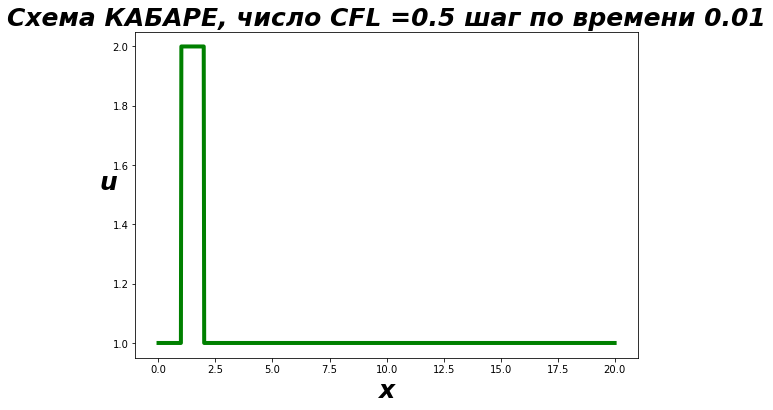

In [5]:
CFL = 0.5                # число CFL
a   = 1.0                 # скорость распространения возмущений
delta_t = CFL*delta_x/a   # dt = c*dx/a

#------------------------
# Расчет по явным схемам 
#------------------------

visualize(CABARET,'КАБАРЕ', x_cent, x_bound, M, delta_x, delta_t, a, CFL)

---

#### Задача 13
> Введите в процедуре `CABARET` настроечный параметр $\alpha$ регулирующий ширину области допустимых пределов изменения потоковой величины на этапе коррекции. Сопоставьте решения получаемые с использованием различных значений $\alpha$.

---

In [6]:
def CABARET_Burgers(lBc, rBc, u_f, u_f_next, U, U_next, delta_x, delta_t, a, t):
    '''
    Решение линейного уравнения переноса с использованием явной схемы КАБАРЕ диссипатором Паниковского 
    и нелинейной коррекцией потоков
    
    Параметры:
    lBc - процедура постановки ГУ на левой границе области
    rBC - процедура постановки ГУ на правой границе области
    u   - сеточное значение неизвестной функции u на временном шаге n 
    u_next   - сеточное значение неизвестной функции u на временном шаге n+1

    C   - отношение шагов по времени и пространству
    t   - момент времени tn        
    '''

    diss = 0.0
    cells_number = len(U)
    nu = 0.001
    
    C = delta_t/delta_x
    
    # Этап 1
    for i in range(1,cells_number-1):
        if(i==1):
            u_f[i] = U[i]
        if(i==cells_number-2):
            u_f[i+1] = U[i]
    
        Q = nu * C * (U[i-1] - 2*U[i] + U[i+1])/delta_x
        
        
        U_next[i] = U[i] - 0.25 * C * ((u_f[i+1])**2 - (u_f[i])**2) + Q 
        
    # Этап 2 Экстраполяция
    for i in range(cells_number-1):  
        if (0.5*(U[i] + U[i+1]) >= 0):
            u_f_next[i+1] = (2.0*U_next[i] - (1.0 - diss)*u_f[i])/(1.0 + diss)
        if (0.5*(U[i] + U[i+1]) < 0):
            u_f_next[i+1] = (2.0*U_next[i+1] - (1.0 - diss)*u_f[i+2])/(1.0 + diss)            
        
    # Этап 3 Коррекция
    for i in range(cells_number-1):  
        
         
        if (0.5*(U[i] + U[i+1]) >= 0):
            Q = nu * C * (U[i-1] - 2*U[i] + U[i+1])/delta_x
            max_u = max(u_f[i],U[i],u_f[i+1]) + Q*C*delta_x
            min_u = min(u_f[i],U[i],u_f[i+1]) + Q*C*delta_x
        if (0.5*(U[i] + U[i+1]) < 0):
            Q = nu * C * (U[i] - 2*U[i+1] + U[i+2])/delta_x
            max_u = max(u_f[i+1],U[i+1],u_f[i+2]) + Q*C*delta_x
            min_u = min(u_f[i+1],U[i+1],u_f[i+2]) + Q*C*delta_x

        if (u_f_next[i+1] > max_u):
            u_f_next[i+1] = max_u
        if (u_f_next[i+1] < min_u):
            u_f_next[i+1] = min_u
                
    # Этап 4
    for i in range(1,cells_number-1):
        if(i==1):
            u_f_next[i] = u_f[i]
            U_next[i-1] = U[i]           
        if(i==cells_number-2):
            u_f_next[i+1] = u_f[i]
            U_next[i+1] = U[i]
    
    
        Q = nu * C * (U[i-1] - 2.0*U[i] + U[i+1])/delta_x
        
        U_next[i] = U_next[i] - 0.25 * C * ((u_f_next[i+1])**2 - (u_f_next[i])**2) + Q 

UnboundLocalError: local variable 'line2' referenced before assignment

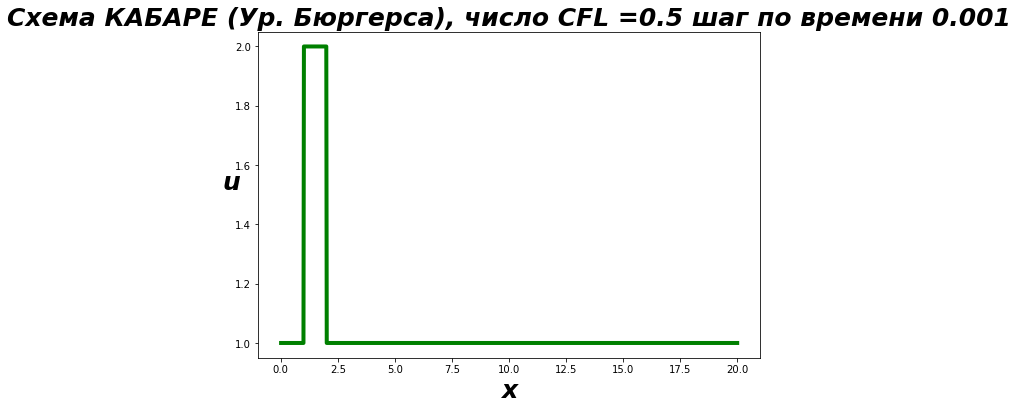

In [7]:
C = 0.25              # число CFL
a = 5.0
delta_t = C*delta_x/a   # dt = c*dx/a

#------------------------
# Расчет по явным схемам 
#------------------------

visualize(CABARET_Burgers,'КАБАРЕ (Ур. Бюргерса)', x_cent, x_bound, M, delta_x, delta_t, a, CFL)

<a id = "s_sec24"></a>
### 24. Схема КАБАРЕ для обномерных уравнений политропного газа в эйлеровых переменных.

---

#### Пример
> Реализуем метод КАБАРЕ для решения уравнений движения политропного газа. Найдите решение задачи Римана $(u_l, \rho_l, u_r, \rho_r)$ в форме правой дозвуковой волны разрежения $\rho_l < \rho_r $, сравните полученное решение с аналитическим решением \eqref{eq:density_solution},\eqref{eq:velocity_solution}.

---

In [9]:
def Riemann_cons(x, u_l, u_r):
    sol = np.zeros(len(x))
    for i in range(0,len(x)):
        if (x[i] > 10):
            sol[i] = u_r
        if (x[i] <= 10):
            sol[i] = u_l
    return(sol)

In [10]:
def Exact_solution(x, rho_l, rho_r, u_l, u_r, Rho_exact, U_exact, t, gamma, a):

    cells_number = len(U)

    c_l = np.sqrt(a*gamma)*rho_l**((gamma - 1)/2)
    c_r = np.sqrt(a*gamma)*rho_r**((gamma - 1)/2)
    
    r_l = u_l + 2.0*np.sqrt(a*gamma)/(gamma-1)*rho_l**((gamma - 1)/2)
    
    Rho_exact[0] = rho_l
    Rho_exact[cells_number-1] = rho_r
    
    for i in range(1,cells_number-1):
        if(x[i] < 10 + (u_l - c_l)*t):
            Rho_exact[i] = rho_l
        if(x[i] > 10 + (u_r - c_r)*t):
            Rho_exact[i] = rho_r
        if((x[i] < 10 + (u_r - c_r)*t)&(x[i] > 10 + (u_l - c_l)*t)):
            Rho_exact[i] = (((gamma-1)/(gamma+1))*(1/(np.sqrt(a*gamma)))*( -(x[i]-10)/t + r_l))**(2/(gamma-1))
#            print(Rho_exact[i])

In [19]:
def visualize_gas_dynamics(scheme,scheme_name, x_cent, x_bound, M, delta_t, delta_x, u_l, u_r, rho_l, rho_r, gamma, a):
    
    '''
    Процедура visualize выполняет итерации по времени для заданной разностной схемы
    
    scheme       - процедура реализующая схему
    scheme_name  - название схемы 
    M            - число итраций по времени
    delta_t      - шаг по времени dt
    '''

    import matplotlib.pyplot as plt
    
    print(M)
    
    fig = plt.figure(figsize=(15,11))
    host = fig.add_subplot(111)
    
    par1 = host.twinx()
    par2 = host.twinx()
    
    host.set_xlim(7.5,12.5)
    host.set_xlabel('x, m',fontsize = 25,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')
    host.set_ylabel('Массовая скорость, m/s',fontsize = 25,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')
    par1.set_ylabel('Плотность, kg/m3',fontsize = 25,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')
    par2.set_ylabel('Наклон левой характеристики, m/s',fontsize = 25,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')
    
    par2.spines['right'].set_position(('outward', 70))
    
    host.tick_params(labelsize=20)
    par1.tick_params(labelsize=20)
    par2.tick_params(labelsize=20)
    
#    fig, ax = plt.subplots(figsize=(12, 9))
    host.set_title('Схема '+scheme_name+', число CFL =' + str(C) + ' шаг по времени ' + str(delta_t), fontsize = 25,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')
#    ax.set_ylabel("u",rotation=0 ,fontsize = 25,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')
#    ax.set_xlabel("x",fontsize = 25,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')
#    plt.xlim(-1,21)
 #   plt.tight_layout()
    
    time = 0.0

    U_init = Riemann_cons(x_cent,u_l,u_r) 
    U      = U_init.copy()             
    U_next = U_init.copy()
    U_exact = U_init.copy()

    u_f_init = np.zeros(len(x_bound))      # начальное условие u(x,0)
    u_f      = u_f_init.copy()                    # начальные значения u_n, u_{n+1}, u_{n-1} задаем такими же как u(x,0)
    u_f_next = u_f_init.copy()
    
    
    Rho_init = Riemann_cons(x_cent,rho_l,rho_r) 
    Rho      = Rho_init.copy()             
    Rho_next = Rho_init.copy()
    Rho_exact = Rho_init.copy()
    
    
    rho_f_init = np.zeros(len(x_bound))      # начальное условие u(x,0)
    rho_f      = rho_f_init.copy()                    # начальные значения u_n, u_{n+1}, u_{n-1} задаем такими же как u(x,0)
    rho_f_next = rho_f_init.copy()

    speed_of_sound = np.zeros(len(x_cent))
    
    line1, = par1.plot(x_cent, Rho_init, linewidth=4, linestyle='dashed', color="Blue", label = 'начальное условие на плотность газа')
#    line2, = host.plot(x_cent, U_init, linewidth=4, linestyle='dashed', color="Black", label = 'начальное условие на массовую скорость газа')
    
    for n in range(1,M):                # цикл итераций по времени
        
        set_initials = False
        if(n==1):
            set_initials = True
                          
        scheme(left_BC, right_BC, u_f, u_f_next, rho_f, rho_f_next, U, U_next, Rho, Rho_next, delta_t, delta_x, time, speed_of_sound, gamma, a, set_initials)   # расчет по схеме

        Exact_solution(x_cent, rho_l, rho_r, u_l, u_r, Rho_exact, U_exact, time, gamma, a )
        
        if (n%50 == 0):
        #    line3, = host.plot(x_cent, U_next, linewidth=4, color = "Black", alpha=1/M*n, label = 'массовая скорость газа')
            line4, = par1.plot(x_cent, Rho_next, linewidth=6, color = "Blue", alpha=1/M*n, label = 'плотность газа')        
            line5, = par2.plot(x_cent, U_next- speed_of_sound, linewidth=4, color = "Red", alpha=1/M*n, label = 'u - c')
        #    line6, = par1.plot(x_cent, Rho_exact, linewidth=4, linestyle='dashed', color = "Orange", alpha=1/M*n, label = 'точное решение (плотность)')
 
            
        u_f = u_f_next.copy()               # запись значений u_{n+1} в u_{n}
        u_f_next = np.zeros(len(u_f))

        U = U_next.copy()               # запись значений u_{n+1} в u_{n}
        U_next = np.zeros(len(U))        
        
        rho_f = rho_f_next.copy()               # запись значений u_{n+1} в u_{n}
        rho_f_next = np.zeros(len(rho_f))

        Rho = Rho_next.copy()               # запись значений u_{n+1} в u_{n}
        Rho_next = np.zeros(len(Rho))        
        
        
        time = time + delta_t                 # увеличиваем t на dt в конце итерации
    
 #   y_lims = host.get_ylim()
 #   host.set_ylim(y_lims)
    
    leg = host.legend(handles=[line1,line4,line5], loc ="upper right", prop={'size': 18}, bbox_to_anchor=(0.80, -0.1)) 

4.0
101


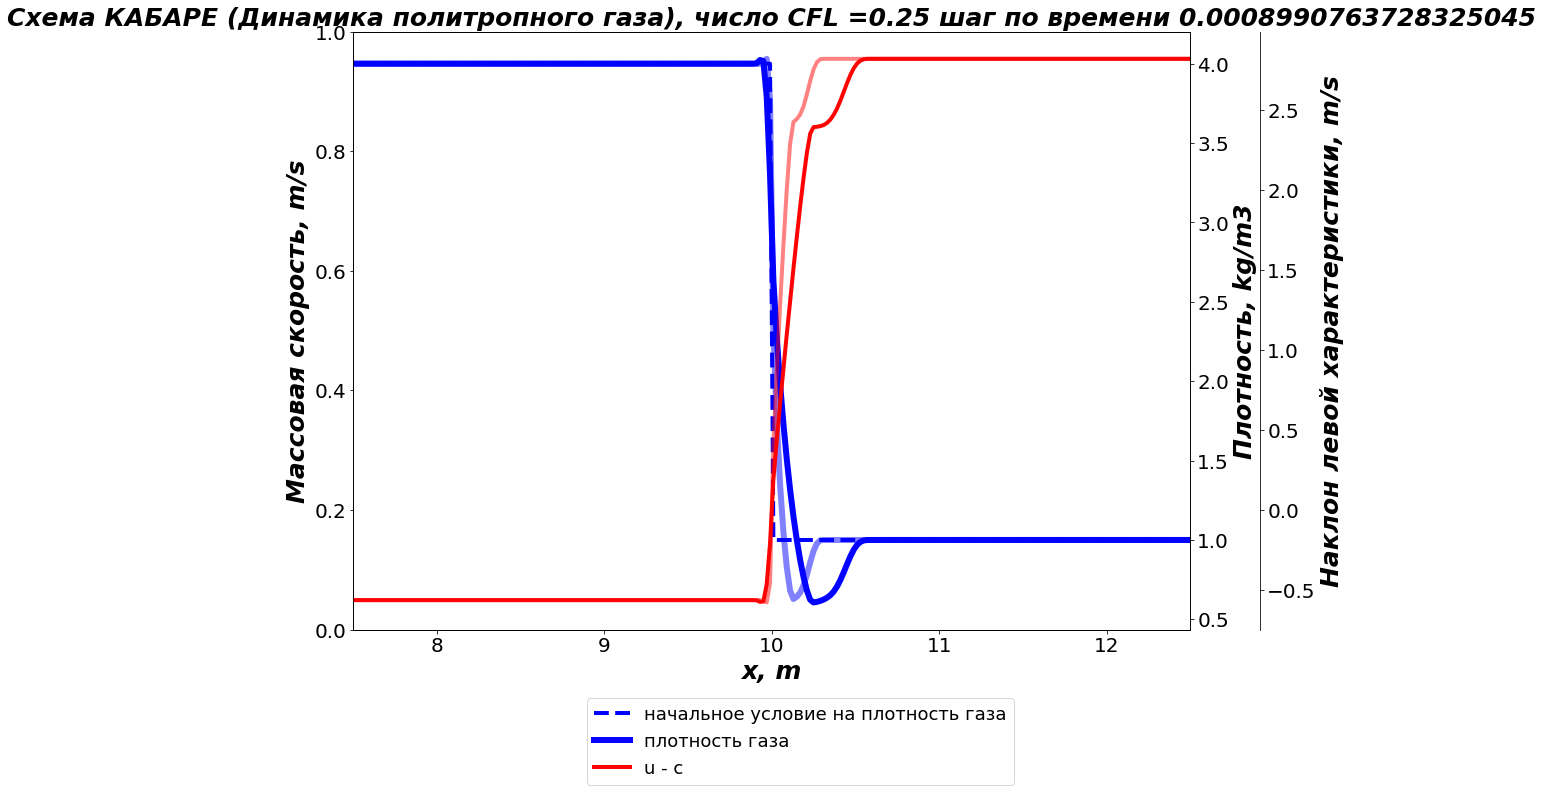

In [70]:
gamma = 1.4
a = 1.0

u_l = 1.0

rho_l = 4.0
rho_r = 1.0

u_r = 4.0

# условие для существования левой волны разрежения
#u_r = u_l + 2*np.sqrt(a*gamma)/(gamma-1)*rho_l**((gamma-1)/2) - 2*np.sqrt(a*gamma)/(gamma-1)*rho_r**((gamma-1)/2) 

print(u_r)

C = 0.25                                     # число CFL
delta_t = C*delta_x/(max(abs(u_l),abs(u_r))+np.sqrt(gamma)*max(rho_l,rho_r)**((gamma-1)/2))   # dt = c*dx/max(u)


#------------------------
# Расчет по явным схемам 
#------------------------

visualize_gas_dynamics(CABARET_Polytropic_gas,'КАБАРЕ (Динамика политропного газа)', x_cent, x_bound, 101, delta_t, delta_x, u_l, u_r, rho_l, rho_r, gamma, a)

## Список литературы.

1. "Новые алгоритмы вычислительной гидродинамики для многопроцессорных вычислитлельных комплексов" *В.М. Головизнин, М.А. Зайцев, С.А. Карабасов, И.А. Короткин* ([МГУ ВМК](http://lim.cs.msu.ru/index.php?id=87), 2013)
2. "Дисперсионные и диссипативные характеристики разностных схем для уравнений в частных производных гиперболического типа" *В.М. Головизнин, А.В. Соловьев* ([МГУ ВМК](http://lim.cmc.msu.ru/index.php?id=9), 2018)
3. "Burgers equation" *Mikel Landjuela* BCAM Internship ([Basque center for applied mathematics(pdf)](http://www.bcamath.org/projects/NUMERIWAVES/Burgers_Equation_M_Landajuela.pdf), 2011)
4. "Numerical Methods for Conservation Laws" *Randall J. LeVeque* ([Springer](https://www.springer.com/gp/book/9783764327231), 1992)
5. "Riemann Solvers and Numerical Methods for Fluid Dynamics" *Eleuterio Toro* ([Springer](https://www.springer.com/gp/book/9783540252023), 2009)



---
**Ячейка снизу загружает стилевую конфигурацию блокнота.**

In [ ]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./custom.css", "r").read()
    return HTML(styles)
css_styling()